In [1]:
import numpy as np
import pandas as pd

# Визначаємо кількість зразків та ознак
samples_count = 1000
features_count = 5

# Генерація випадкових даних для ознак (значення від 0 до 1)
features = np.random.uniform(0, 1, (samples_count, features_count))

# Генерація випадкових міток для задачі класифікації (0 або 1)
labels = np.random.choice([0, 1], size=samples_count)

# Створюємо DataFrame та додаємо мітки як цільову колонку
data = pd.DataFrame(features, columns=[f'Attribute_{num}' for num in range(1, features_count + 1)])
data['Label'] = labels

# Зберігаємо набір даних у CSV файл
data.to_csv('classification_dataset.csv', index=False)
print("Набір даних для класифікації успішно збережено у файл 'classification_dataset.csv'.")


Набір даних для класифікації успішно збережено у файл 'classification_dataset.csv'.


In [3]:
import numpy as np
import csv

# Кількість зразків
num_samples = 150

# Генерація випадкових значень для ознаки x
x_values = np.random.rand(num_samples) * 15  # значення в діапазоні від 0 до 15

# Параметри для лінійної функції
slope = 4.2
intercept = 1.8

# Додавання шуму до значень y
noise_factor = np.random.randn(num_samples) * 1.2  # шум із середнім 0 і стандартним відхиленням 1.2
y_values = slope * x_values + intercept + noise_factor

# Запис даних у CSV файл
with open('C:/Users/gomel/generated_dataset.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['X_value', 'Y_value'])  # Заголовки для стовпців
    for i in range(num_samples):
        writer.writerow([x_values[i], y_values[i]])

print("Набір даних збережено у файл 'generated_classification_data.csv'.")


Набір даних збережено у файл 'generated_classification_data.csv'.


Середньоквадратична помилка: 0.9230864941120203
Коефіцієнт детермінації R²: 0.9974433260102219


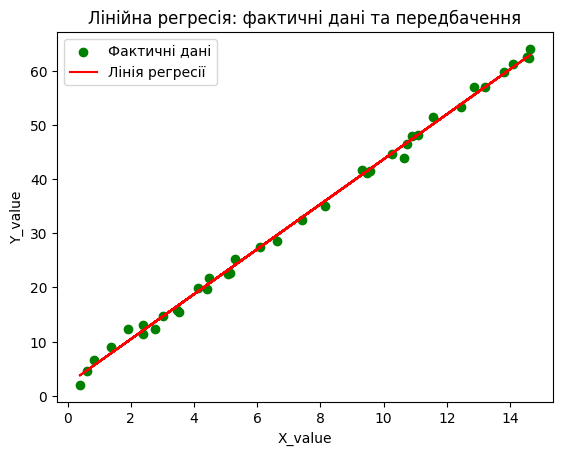

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Завантажуємо дані з CSV файлу
dataset = pd.read_csv('C:/Users/gomel/generated_dataset.csv')

# Вибір ознаки (X) та цільової змінної (y)
X = dataset['X_value'].values.reshape(-1, 1)  # reshape для сумісності з моделлю
y = dataset['Y_value'].values

# Розподіл даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Створення та тренування моделі лінійної регресії
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Прогнозування значень на тестовому наборі
y_pred = regressor.predict(X_test)

# Оцінка результатів моделі
mse = mean_squared_error(y_test, y_pred)  # середньоквадратична помилка
r2 = r2_score(y_test, y_pred)  # коефіцієнт детермінації R²

# Виведення результатів
print(f"Середньоквадратична помилка: {mse}")
print(f"Коефіцієнт детермінації R²: {r2}")

# Візуалізація фактичних даних та лінії регресії
plt.scatter(X_test, y_test, color='green', label='Фактичні дані')
plt.plot(X_test, y_pred, color='red', label='Лінія регресії')
plt.xlabel('X_value')
plt.ylabel('Y_value')
plt.title('Лінійна регресія: фактичні дані та передбачення')
plt.legend()
plt.show()


In [2]:
import pandas as pd

# Вказуємо шлях до файлу
file_path = 'C:/Users/gomel/Downloads/mushrooms.csv'

# Завантажуємо дані з CSV файлу
data = pd.read_csv(file_path)

# Виводимо перші 5 рядків даних
print(data.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

Перші 5 рядків даних:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p 

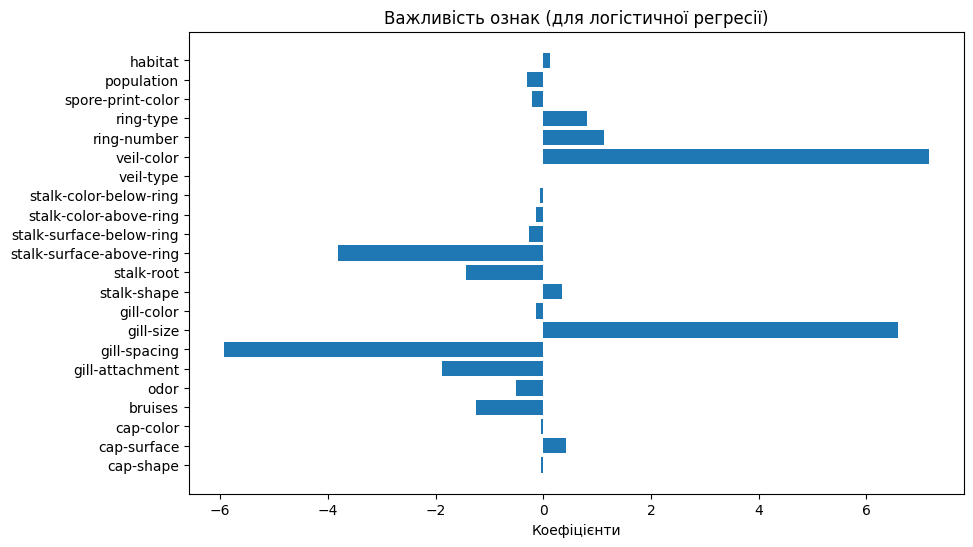

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Вказуємо шлях до файлу
file_path = '/Users/gomel/Downloads/mushrooms.csv'

# Завантажуємо дані з CSV файлу
data = pd.read_csv(file_path)

# Виводимо перші 5 рядків даних
print("Перші 5 рядків даних:")
print(data.head())

# Ініціалізація LabelEncoder для категоріальних змінних
le = LabelEncoder()

# Перетворення всіх стовпців на числові значення
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Вибір незалежних змінних (X) та цільової змінної (y)
X = data.drop('class', axis=1)  # Всі стовпці, крім 'class'
y = data['class']  # Цільова змінна - 'class' (їстівний чи отруйний)

# Розподіл на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Створення моделі логістичної регресії
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Прогнозування значень на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Візуалізація важливості ознак (тільки для моделей, які дозволяють це, наприклад, дерева рішень)
# Оскільки ми використовуємо логістичну регресію, важливість може бути виражена через коефіцієнти
coefficients = model.coef_[0]
features = X.columns

# Побудова графіка для візуалізації важливості ознак
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel("Коефіцієнти")
plt.title("Важливість ознак (для логістичної регресії)")
plt.show()
